# **MODEL PROJECT: NASH EQUILIBRIA IN OLIGOPOLY MODELS - SUSTAINING COALITION IN COURNOT**

By Emma Knippel, Anna Abildskov and Oscar Nyholm

# 1 Imports and Set magics

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2
%matplotlib inline

# local modules
import modelproject
from modelproject import CournotDuopoly
from modelproject import BertrandDuopoly
from modelproject import CournotOligopoly
from modelproject import BertrandOligopoly

# 2 Model description

**2.1 Markets with oligopoly**

two firms bla bla bla
The market with oligopoly is set up with a linear inverse demand function and a production fucntion with a constant marginal cost.
$$\begin{aligned} 
p(q) = a - bq\\
C(q) = cq
\end{aligned}$$

**2.2 Cournot Oligopoly**

In the Cournot Oligopoly, we have two similar firms producing two goods: $q_1$ and $q_2$. The total production is $q \equiv q_1 + q_2$. 
Thus, the equations above in he Cournot oligopoly become:
$$\begin{aligned}
&p(q_1,q_2) = a-b(q_1+q_2)\\
&C(q_i) = cq_i, &\;\text{for } i = 1,2
\end{aligned}$$
The firms profits of each firm depends not only on their own production, but of the other firm:
$$\begin{aligned} 
\pi_1(q_1,q_2) = p(q_1,q_2)q_1-C(q_1)\\
\pi_2(q_1,q_2) = p(q_1,q_2)q_2-C(q_2)
\end{aligned}$$

**2.3 Bertrand Oligopoly**

In the Bertrand Oligopoly, we utilize the demand function (not the inverse) and we keep the production functionn with a constant marginal cost, $C(q)$:
$$\begin{align}
D(p)=\frac{a-p}{b}
\end{align}$$
The main difference in the Bertrand oligopoly is that the firms  each set individual prices, $p_1,p_2$ instead of being price-takers.
We also make the following assumptions:
* If the prices are different, all consumers buy from the firm with the lower price.

* If the firms set the same price, they split the consumers evenly between them.

* The produced quantity follows from the demand function.

Therefore, the firm's sold quantities depend on their individual demand function, $D_1$ and $D_2$:
$$\begin{aligned}
D_1(p_1,p_2)=
\begin{cases} 
D(p_1) & \text{for } p_1 < p_2 \\
\frac{D(p_1)}{2} & \text{for } p_1 = p_2 \\
0 & \text{for } p_1 > p_2 
\end{cases}
\end{aligned}$$

$$\begin{aligned}
D_2(p_1,p_2)=
\begin{cases} 
D(p_2) & \text{for } p_2 < p_1 \\
\frac{D(p_2)}{2} & \text{for } p_1 = p_2 \\
0 & \text{for } p_2 > p_1 
\end{cases}
\end{aligned}$$

This implies the following profit functions:
$$\begin{aligned}
\pi_1(p_1,p_2)=(p_1-c)D_1(p_1,p_2)\\
\pi_2(p_1,p_2)=(p_2-c)D_2(p_1,p_2)
\end{aligned}$$

## 3 Analytical solution

**3.1 Cournot Analytical Solution**

Each firm attempts to maximize profits given the quantity set by the other firm:
$$\begin{aligned} 
\max_{q_1} p(q_1,q_2)q_1-C(q_1)\\
\max_{q_2} p(q_1,q_2)q_2-C(q_2)
\end{aligned}$$

This implicates the following first order condition:
$$\begin{aligned} 
FOC_1 = \frac{∂\pi_1(q_1,q_2)}{∂q_1}=0\\
\Leftrightarrow q_1^*(q_2)=\frac{a-c}{2b}-\frac{1}{2}q_2,
\end{aligned}$$
which is equivalent for the other firm:
$$\begin{aligned}
FOC_2 =  \frac{∂\pi_2(q_1,q_2)}{∂q_2}=0\\
\Leftrightarrow q_2^*(q_1)=\frac{a-c}{2b}-\frac{1}{2}q_1,
\end{aligned}$$

When both firms are best-responding to each other, we achieve the following symmetric Nash Equilibrium:
$$\begin{aligned}
q_1^* = q_2^* = \frac{a-c}{3b}
\end{aligned}$$

**3.2 Bertrand Analytical Solution**

Once again, each firm attempts to maximize profits given the price set by the other firm:
$$\begin{align}
\max_{p_1}(p_1-c)D_1(p_1,p_2)\\
\max_{p_2}(p_2-c)D_2(p_1,p_2)
\end{align}$$

The assumptions made in 2.3 mean that the solution to the Bertrand model is slightly different. Intuitively, it goes through the following four steps:
1. No one will ever set a price below marginal cost, where he/she will lose money with every unit produced. 

2. When one firm sets a price higher than marginal cost, the other firm can always set a slightly lower price and steal the entire market.

3. Because of steps 1 and 2, in equilibrium the two firms compete until the equilibrium price is $p_1 = p_2 = c$.

Therefore, the unique Nash Equilibrium, where both firms are best-responding to the other's price-setting is defined as:
$$\begin{aligned}
p_1^* = p_2^* = c
\end{aligned}$$

Which is exactly what we observe under perfect competition.

## 4 Numerical solution

**SUPER VIGTIGT!!! Husk at give en klar definition af de ydre bounds på a, b og c, for hvis a bliver lavere end c, så går quantity i minus og det må den selvfølgelig ikke**

In [2]:
cournot_dp = CournotDuopoly(20,1,5)
cournot_dp.ne_plot()


interactive(children=(IntSlider(value=35, description='a', max=50, min=20), FloatSlider(value=0.5, description…

In [4]:
bertrand_dp = BertrandDuopoly(20,2,5)
bertrand_dp.ne_plot()

interactive(children=(IntSlider(value=35, description='a', max=50, min=20), FloatSlider(value=0.5, description…

**Comparison of Cournot and Bertrand Duopoly**
- Why are they different? Quantity vs. price
- What are the quantitites and prices they end up in, respectively. 

# 5 Further analysis

Make detailed vizualizations of how your model changes with parameter values. 
- Måske skal den interaktive model af Cournot herned?? Og så have en simpel figur for et sæt af værdier ovenfor?

Try to make an extension of the model. 
- Using interpolation til at vise konvergering af Cournot oligopol, hvor alle virksomheder har indflydelse på markedet, til fuldkommen konkurrence market

**5.1 Cournot Oligopoly with $N$ firms**

In the Cournot Oligopoly, we have $N$ identical firms producing the same goods: $q_i$. The total production is $q \equiv \sum_{i=1}^{N} q_i$. 
Thus, the equations in he Cournot oligopoly become:
$$\begin{aligned}
&p(q) = a-b(q_1+q_2+...+q_N)\\
&C(q_i) = cq_i, &\;\text{for } i = 1,2,...,N
\end{aligned}$$


The profits of each firm depends not only on their own production, but of the other firms as well:
$$\begin{aligned}
\pi_{i}(q_1,q_2,...,g_N) = p(q)q_i-C(q_i)
\end{aligned}$$


The analytical solution is the same as for a Cournot Duopoly, each firm sets the quantity they produce as a BR to the other firms quantity.
$$\begin{aligned}
\max_{q_i} p(q)q_i-C(q_i),  &\;\text{for } q=(q_1+...+q_N)\\
\end{aligned}$$

This implicates the following first order condition for all firms:
$$\begin{aligned}
FOC_i = \frac{∂\pi_i(q_1,...,q_N)}{∂q_i}=0\\
\Leftrightarrow q_i^*(q_1,...,q_N)=\frac{a-c}{2b}-\frac{1}{2}(\sum_{j=1≠i}^{N} q_j),
\end{aligned}$$

The unique equilibrium is therefor still when all firms set their quantities as their BR to each other:
$$\begin{aligned}
q_1^* = q_2^* = ... = q_N^* = \frac{a-c}{(N+1)b}
\end{aligned}$$

As shown in the preliminary analysis, the Cournot Duopoly, i.e. two firms present within the market, has the quantity and price somewhere between a simple monopoly and a market with full competition. For our extension, we are interested in examining how many firms are needed withtin the market for the Cournot Oligopoly to be equal to a market with full competetion in regards to quantity produced and price set, given certain levels of costs. 

**5.2 Bertrand Oligopoly with $N$ firms**

In the bertrand oligolpoly, cf. section 3.2, price is already driven down to marginal cost by the repsective firms' abilities to undercut each other and steal the market. Therefore, adding more firms will leave prices and profits unaffected in the Nash equilibria; it appears the same way as a market with perfect competition from the get-go and remains this way when more firms are added.

Therefore, in our further analysis, the baseline for the market with infinite firms and thus, perfect comptetition, will be our Bertrand Oligipoly. Our goal is to examine how and when the Cournot oligopoly expands its number of firms sufficiently to converge to zero-profits and marginal-cost-prices, becoming more and more similar to the Bertrand oligopoly.


In [ ]:
import matplotlib as plt
from modelproject import CournotOligopoly

w = np.linspace(2,10,1)

c_d = np.array(CournotOligopoly(5,w),None)
display(c_d)

f = lambda x: 10 - 2*x

G = c_d
F = f(G)

grid = np.linspace(-7,12,500) # 500 makes it "fine"
F_true = f(grid)

X = [4.1,7.5,9.1]
F_approx = []
for x in X:
    true = f(x)
    y = linear_interpolate(G,F,x)
    F_approx.append(y)
    print(f'x = {x:4.1f} -> true = {true:6.1f}, interpolated = {y:6.1f}')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(G,F,'o',label='known points')
ax.plot(grid,F_true,'-',lw=1,label='true function')
ax.plot(X,F_approx,'s',lw=1,label='interpolated')
ax.legend(loc='lower right',facecolor='white',frameon=True);  

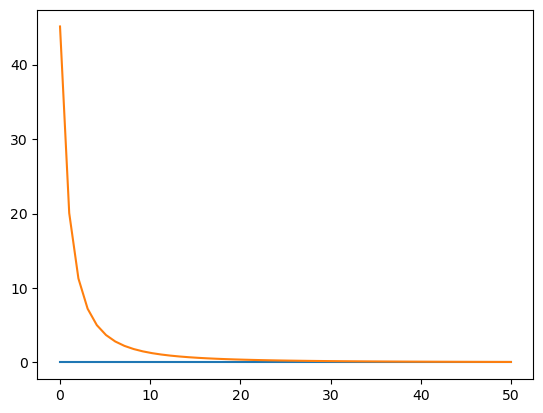

In [7]:
b_o = BertrandOligopoly(1)
b_o.nash_profit()
firms = np.linspace(0,50,50)
c_o = CournotOligopoly(1)
c_o.nash_profit()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(firms,b_o.nash_profit())
ax.plot(firms,c_o.nash_profit())


# 6 Conclusion

Add concise conclusion. 